# Simple Linear Regression

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data
1. Read the data 
2. Find out conatining data information
3. Conver the data as per we want
4. Uasing EDA understand the data

In [40]:
data = pd.read_csv(r"C:\Users\MANDAR\Desktop\LRML\day.csv")

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [42]:
season  = {1 : 'spring', 2: 'summer' , 3: 'fall' , 4 : 'winter'}
data.season = [season[item] for item in data.season]
weekday  = { 1 :'Monday',  2 : 'Tuesday',  5 : 'Friday',  3 : 'Wednesday',  4 : 'Thursday',  0 : 'Sunday',  6 : 'Saturday'}
data.weekday = [weekday[item] for item in data.weekday]
mnth = { 1 :'Janauary', 2 :'February', 3 :'March', 4:'April',5:'May', 6 :'June', 7 :'July',8 :'August',9 :'September',
10 :'October', 11 :'November', 12 :'December'} 
data.mnth = [mnth[item] for item in data.mnth]
weathersit = {1 : 'Clear' , 2 : 'Mist' , 3 : 'Light_Snow' , 4 : 'Heavy_Rain'}
data.weathersit = [weathersit[item] for item in data.weathersit ]

##### Visualising the EDA

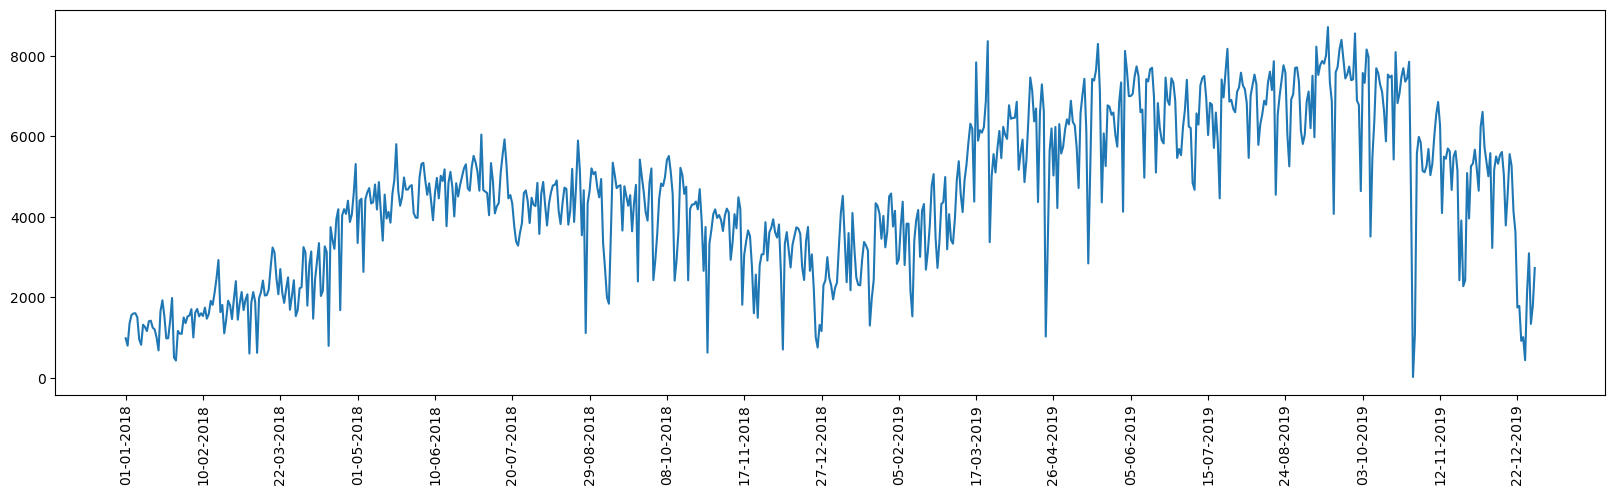

In [43]:
fig = plt.figure(figsize=(20,5 ))
plt.plot(data.dteday, data.cnt)
plt.xticks(range(0,len(data.index),40),rotation = 90)
plt.show()

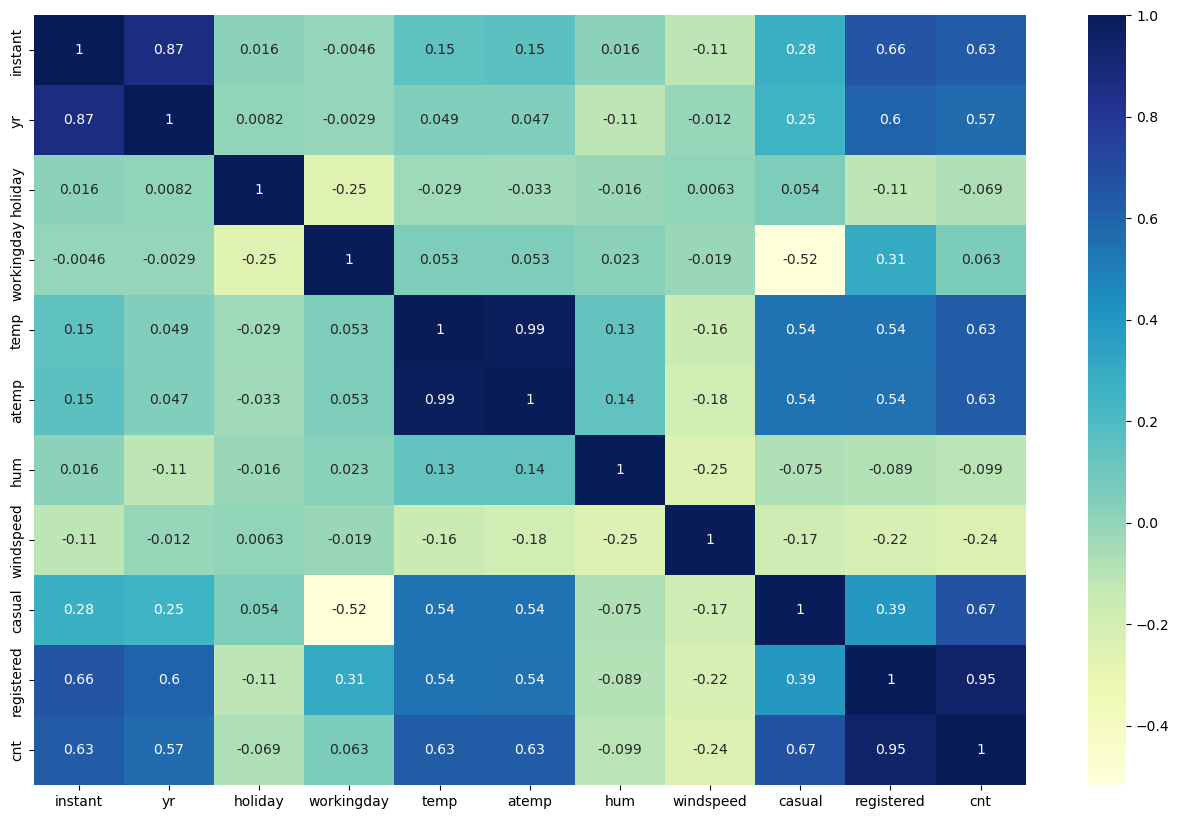

In [44]:
plt.figure(figsize = (16,10))

sns.heatmap(data.corr(),annot = True,cmap = "YlGnBu")
plt.show()

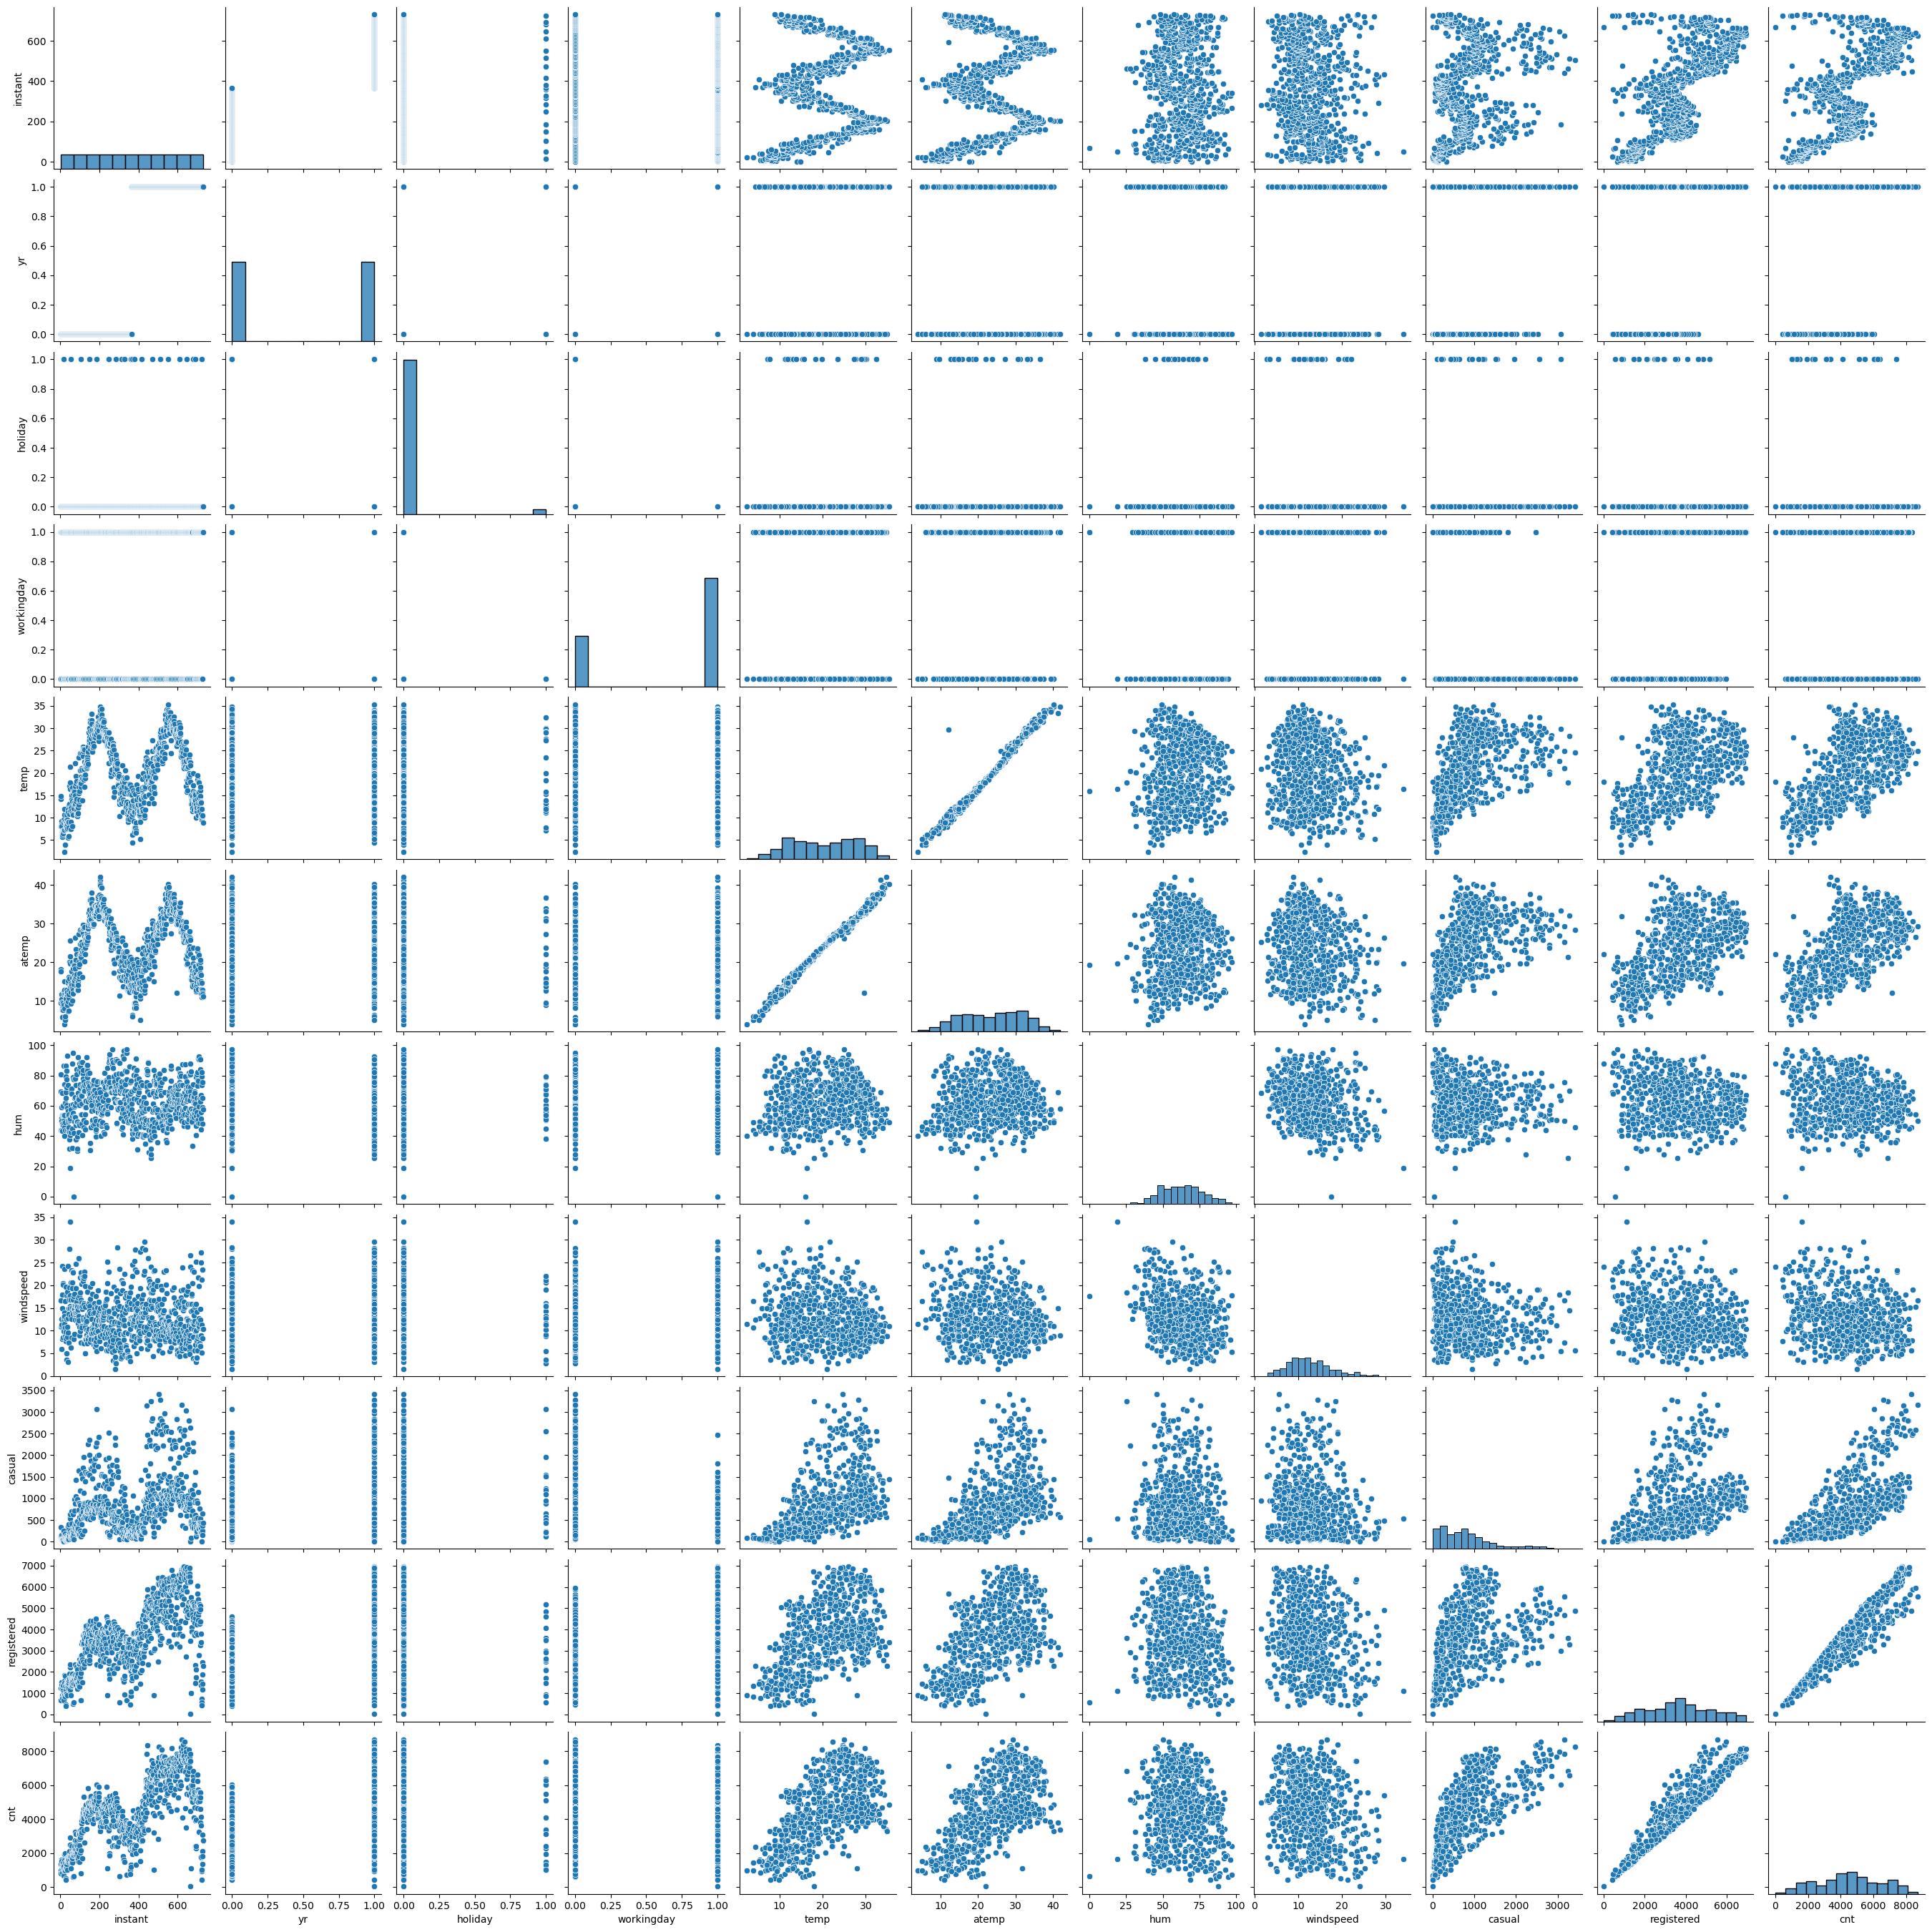

In [45]:
sns.pairplot(data)
plt.show()

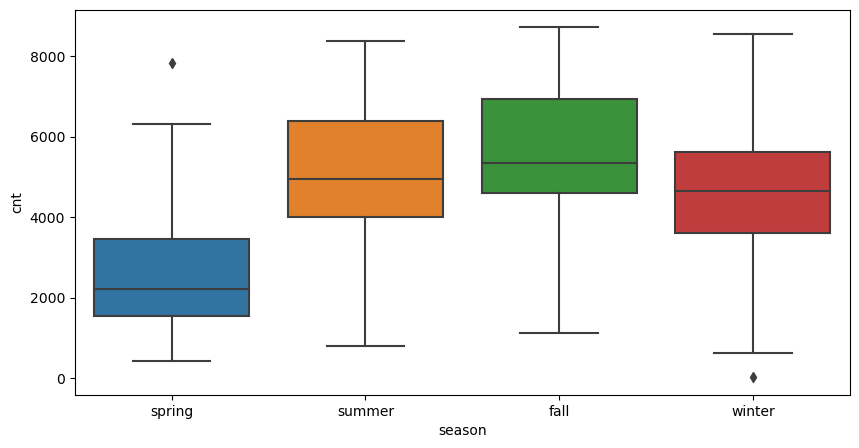

In [46]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.show()

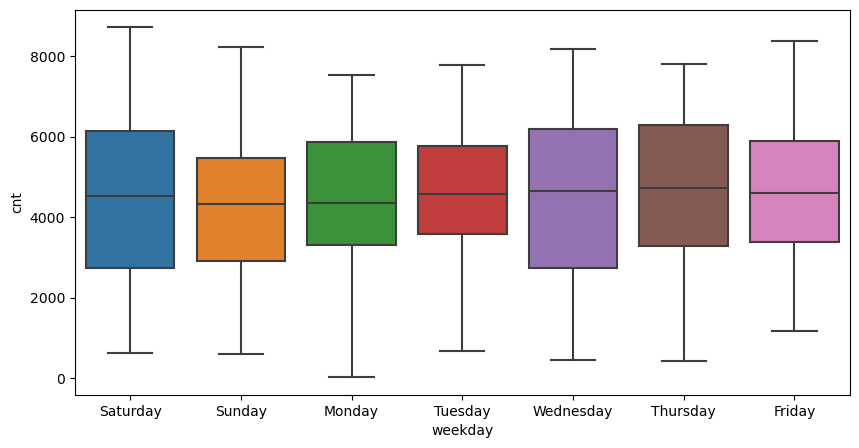

In [47]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.show()

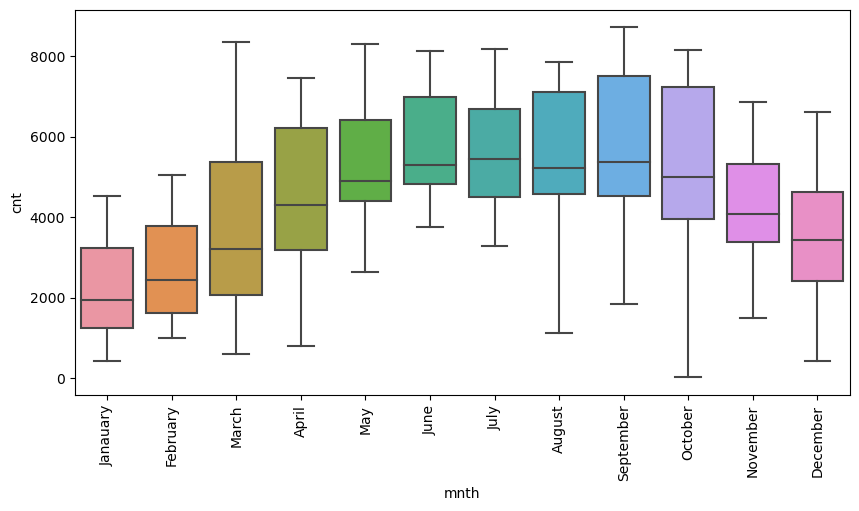

In [48]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.xticks(rotation = 90)
plt.show()

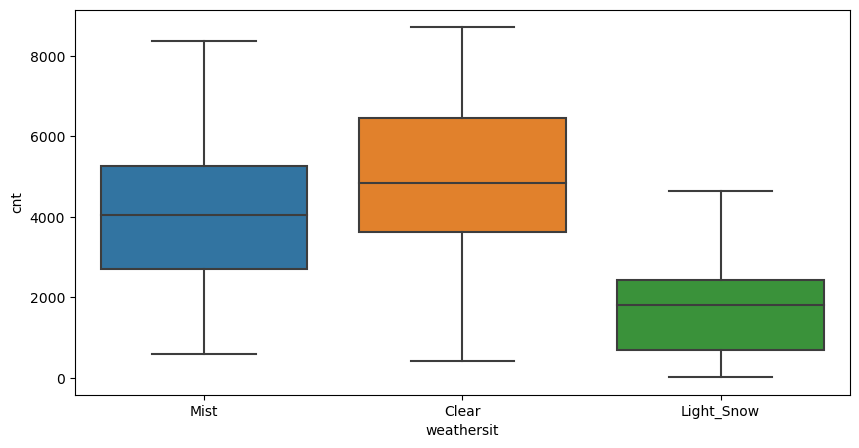

In [49]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

### Creating the dummy veriables for weathersit, season, mnth, weekday

In [50]:
status = pd.get_dummies(data['weathersit'], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.drop(['weathersit'], axis = 1, inplace = True)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Light_Snow,Mist
0,1,01-01-2018,spring,0,Janauary,0,Saturday,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1
1,2,02-01-2018,spring,0,Janauary,0,Sunday,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1
2,3,03-01-2018,spring,0,Janauary,0,Monday,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,4,04-01-2018,spring,0,Janauary,0,Tuesday,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,5,05-01-2018,spring,0,Janauary,0,Wednesday,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [51]:
status = pd.get_dummies(data['season'], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.drop(['season'], axis = 1, inplace = True)
data.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Light_Snow,Mist,spring,summer,winter
0,1,01-01-2018,0,Janauary,0,Saturday,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,0,0
1,2,02-01-2018,0,Janauary,0,Sunday,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,0,0
2,3,03-01-2018,0,Janauary,0,Monday,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,4,04-01-2018,0,Janauary,0,Tuesday,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,5,05-01-2018,0,Janauary,0,Wednesday,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [52]:
status = pd.get_dummies(data['mnth'], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.drop(['mnth'], axis = 1, inplace = True)
data.head()

,instant,dteday,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,...,December,February,Janauary,July,June,March,May,November,October,September
0,1,01-01-2018,0,0,Saturday,0,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,0,0,Sunday,0,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,0,0,Monday,1,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,Tuesday,1,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,0,0,Wednesday,1,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [53]:
status = pd.get_dummies(data['weekday'], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.drop(['weekday'], axis = 1, inplace = True)
data.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,1,0,0,0,0
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,1,0,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,0,1,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,1


In [54]:
data.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'Light_Snow', 'Mist',
       'spring', 'summer', 'winter', 'August', 'December', 'February',
       'Janauary', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered', 'cnt']

data[num_vars] = scaler.fit_transform(data[num_vars])

data.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,01-01-2018,0,0,0,0.355170,0.373517,0.828620,0.284606,0.096538,...,0,0,0,0,0,1,0,0,0,0
1,2,02-01-2018,0,0,0,0.379232,0.360541,0.715771,0.466215,0.037852,...,0,0,0,0,0,0,1,0,0,0
2,3,03-01-2018,0,0,1,0.171000,0.144830,0.449638,0.465740,0.034624,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,0,0,1,0.175530,0.174649,0.607131,0.284297,0.031103,...,0,0,0,0,0,0,0,0,1,0
4,5,05-01-2018,0,0,1,0.209120,0.197158,0.449313,0.339143,0.023474,...,0,0,0,0,0,0,0,0,0,1


# Step 2: Training  the Model

##### Split data into Train and Test

In [56]:
df_train , df_test = train_test_split(data , train_size = 0.7, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(510, 34)
(220, 34)


In [57]:
y_train = df_train.pop('cnt')
X_train = df_train

# cheaking the R square and drop features( Acording to accuracy)

In [58]:
data.drop(['instant', 'dteday'], axis =1, inplace = True)

In [59]:
import statsmodels.api as sm

X_tarin_sm = X_train[['yr','holiday', 'workingday' , 'temp' ,'hum' ,'windspeed','casual', 'registered']]
X_tarin_sm = sm.add_constant(X_tarin_sm)

In [60]:
X_train_lm = sm.add_constant(X_tarin_sm)
lm = sm.OLS(y_train,X_train_lm).fit()  

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.693e+29
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:30:57   Log-Likelihood:                 16455.
No. Observations:                 510   AIC:                        -3.289e+04
Df Residuals:                     501   BIC:                        -3.285e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.318e-15   7.48e-16      1.763      0.0

In [61]:
X_tarin_sm = X_train[['yr','holiday' , 'temp' ,'hum']]
X_train_lm = sm.add_constant(X_tarin_sm)

lm = sm.OLS(y_train,X_train_lm).fit()  

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     302.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.32e-132
Time:                        18:30:57   Log-Likelihood:                 350.81
No. Observations:                 510   AIC:                            -691.6
Df Residuals:                     505   BIC:                            -670.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1864      0.027      6.827      0.0

In [62]:
X_tarin_sm = X_train[['yr','holiday' , 'temp' ,'hum' ,'Light_Snow', 'Mist','spring', 'summer', 'winter']]
X_train_lm = sm.add_constant(X_tarin_sm)

lm = sm.OLS(y_train,X_train_lm).fit()  

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     238.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.95e-174
Time:                        18:30:57   Log-Likelihood:                 463.38
No. Observations:                 510   AIC:                            -906.8
Df Residuals:                     500   BIC:                            -864.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.034      5.824      0.0

In [63]:
X_tarin_sm = X_train[['yr','holiday' , 'temp'  ,'Light_Snow', 'Mist','spring', 'summer', 'winter']]
X_train_lm = sm.add_constant(X_tarin_sm)

lm = sm.OLS(y_train,X_train_lm).fit()  

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     266.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.09e-175
Time:                        18:30:57   Log-Likelihood:                 462.08
No. Observations:                 510   AIC:                            -906.2
Df Residuals:                     501   BIC:                            -868.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1721      0.030      5.799      0.0

In [64]:
X_tarin_sm = X_train[['yr','holiday' , 'temp'  ,'Light_Snow', 'Mist','spring', 'summer', 'winter', 'August', 'December', 'February',
       'Janauary', 'July', 'June', 'March', 'May', 'November', 'October',
       'September']]
X_train_lm = sm.add_constant(X_tarin_sm)

lm = sm.OLS(y_train,X_train_lm).fit()  

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     124.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.43e-173
Time:                        18:30:57   Log-Likelihood:                 488.15
No. Observations:                 510   AIC:                            -936.3
Df Residuals:                     490   BIC:                            -851.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1920      0.042      4.598      0.0

In [65]:
X_tarin_sm = X_train[['yr','holiday' , 'temp'  ,'Light_Snow', 'Mist','spring', 'summer', 'winter','September','August', 'March']]
X_train_lm = sm.add_constant(X_tarin_sm)

lm = sm.OLS(y_train,X_train_lm).fit()  

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.26e-180
Time:                        18:30:57   Log-Likelihood:                 482.41
No. Observations:                 510   AIC:                            -940.8
Df Residuals:                     498   BIC:                            -890.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1230      0.030      4.064      0.0

In [66]:
X_tarin_sm = X_train[['yr','holiday' , 'temp'  ,'Light_Snow', 'Mist','spring', 'summer', 'winter','September','August', 'March',
                     'Sunday', 'Thursday', 'Tuesday','Wednesday', 'Monday', 'Saturday']]
X_train_lm = sm.add_constant(X_tarin_sm)

lm = sm.OLS(y_train,X_train_lm).fit()  

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     142.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.97e-177
Time:                        18:30:57   Log-Likelihood:                 492.27
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     492   BIC:                            -872.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1432      0.032      4.509      0.0

In [67]:
X_tarin_sm = X_train[['yr','holiday' , 'temp'  ,'Light_Snow', 'Mist','spring', 'summer', 'winter','September','August', 'March',
                     'Sunday']]
X_train_lm = sm.add_constant(X_tarin_sm)

lm = sm.OLS(y_train,X_train_lm).fit()  

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     201.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.69e-182
Time:                        18:30:57   Log-Likelihood:                 490.41
No. Observations:                 510   AIC:                            -954.8
Df Residuals:                     497   BIC:                            -899.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1311      0.030      4.386      0.0

# Step 3: Residual analysis

In [68]:
y_test = df_test.pop('cnt')
X_test = df_test

Text(0.5, 0, 'Errors')

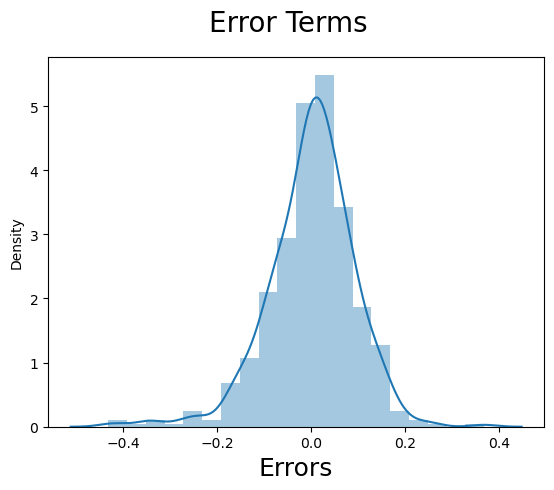

In [69]:
y_train_count = lm.predict(X_train_lm)

# Importing the required libraries for plots.

%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Calculate VIF for selected features 

In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_tarin_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.30
6,summer,2.13
0,yr,2.07
9,August,1.71
5,spring,1.70
7,winter,1.67
4,Mist,1.58
8,September,1.37
10,March,1.29
11,Sunday,1.18


# Step 4:  Predecting and evaluating on the test set

In [71]:

X_test_new = X_test[['yr','holiday' , 'temp'  ,'Light_Snow', 'Mist','spring', 'summer', 'winter','September','August', 'March',
                     'Sunday']]
X_test_new = sm.add_constant(X_test_new)

y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

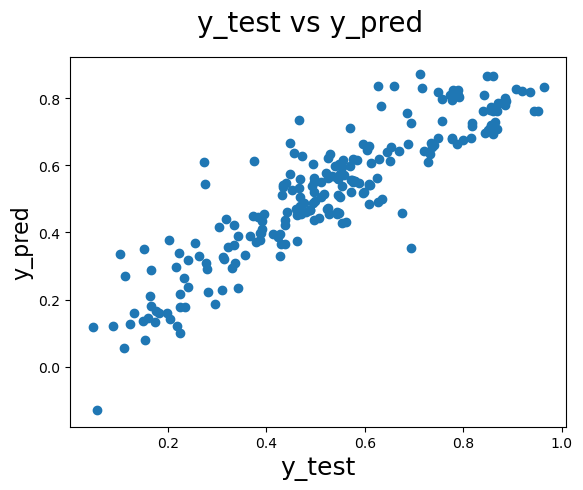

In [72]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# Model Evaluation

In [36]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_count)

0.8297738603619894